# Regression analyisis

In [1]:

#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(10,7)})

#copy the path of the sample quotes: (to big to put in the git)
#ALEX: 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'
#JULES: ...
#MARIN: ...
#NICO: ...


path_2_data = 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'


#import the dataset sample
df = pd.read_json(path_2_data + 'polUS_quotes_speakers_merged.json.bz2',compression="bz2",lines=True)
df2 = pd.read_json(path_2_data + 'Speakers_aggregation.json.bz2',compression="bz2",lines=True)

df.describe()
df2.describe()

,p1,p2,delta_p,year,colloquial,lastrevid
count,39482.000000,39482.000000,39482.000000,39482.000000,39482.000000,3.948200e+04
mean,0.805335,0.167410,0.637925,2017.617699,0.284636,1.392228e+09
std,0.097171,0.080209,0.172354,1.813997,0.451247,8.928226e+06
min,0.501000,0.012100,0.300000,2015.000000,0.000000,1.184424e+09
25%,0.730000,0.101000,0.497800,2016.000000,0.000000,1.392576e+09
50%,0.815800,0.159600,0.652100,2018.000000,0.000000,1.393144e+09
75%,0.885600,0.228900,0.782300,2019.000000,1.000000,1.393554e+09
max,0.987900,0.350000,0.975800,2020.000000,1.000000,1.396190e+09


In [2]:
df2

,label,qid_unique,0,1,quotes_number,fraction,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,candidacy,type,religion
0,Barack Obama,Q76,1008,359,1367,0.262619,"[Barack Hussein Obama II, Barack Obama II, Bar...",[+1961-08-04T00:00:00Z],[Q30],[Q6581097],1395141963,"[Q49085, Q6935055, Q12826303, Q6392846]",O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]"
1,Bernie Sanders,Q359442,723,268,991,0.270434,[Bernard Sanders],[+1941-09-08T00:00:00Z],[Q30],[Q6581097],1392561607,[Q7325],S000033,"[Q82955, Q1930187, Q154549, Q1622272, Q36180, ...","[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268]
2,Francis,Q450675,641,271,912,0.297149,"[Jorge Mario Bergoglio, Francisco, Pope Franci...",[+1936-12-17T00:00:00Z],"[Q237, Q414]",[Q6581097],1396054797,[Q1056744],None,"[Q63173086, Q593644, Q104050302, Q36180, Q1234...",None,[Q1233889],Q450675,None,item,[Q9592]
3,Hillary Clinton,Q6294,645,245,890,0.275281,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],[Q30],[Q6581072],1393846565,None,C001041,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,"[Q699872, Q4791768]",item,[Q33203]
4,Andrew Cuomo,Q11673,476,182,658,0.276596,[Andrew Mark Cuomo],[+1957-12-06T00:00:00Z],[Q30],[Q6581097],1393197828,[Q974693],None,"[Q40348, Q82955]",[Q29552],[Q1540185],Q11673,"[Q22023432, Q65047185]",item,[Q1841]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107408,Nicole Ray,Q3089268,1,0,1,0.000000,None,[+1989-11-04T00:00:00Z],[Q30],[Q6581072],1343056845,None,None,[Q488111],None,None,Q3089268,None,item,None
107409,Frédéric Chatillon,Q3089706,1,0,1,0.000000,[Frédéric Dalle],[+1968-02-15T00:00:00Z],[Q142],[Q6581097],1391428358,None,None,"[Q2961975, Q11499147]",[Q205150],None,Q3089706,None,item,None
107410,Enrique Cabrero Mendoza,Q30899645,0,1,1,1.000000,[Enrique Cabrero],[+1956-02-08T00:00:00Z],[Q96],[Q6581097],1320598979,None,None,[Q901],None,None,Q30899645,None,item,None
107411,Mohammad Abdul,Q30899827,0,1,1,1.000000,None,None,[Q817],[Q6581097],1373978834,None,None,[Q6665249],None,None,Q30899827,None,item,None


## Zipf
Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency). For example, the word "the" (as described above) would appear at x = log(1), y = log(#number of word). It is also possible to plot reciprocal rank against frequency or reciprocal frequency or interword interval against rank. The data conform to Zipf's law to the extent that the plot is linear.



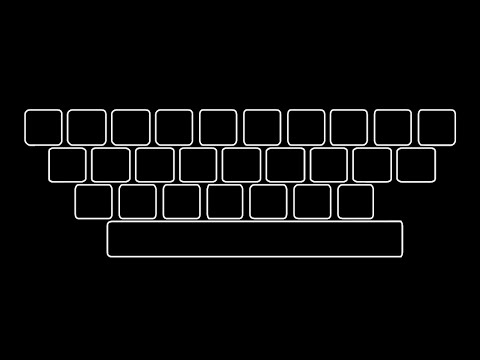

In [16]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('fCn8zs912OE')

TypeError: 'builtin_function_or_method' object is not subscriptable

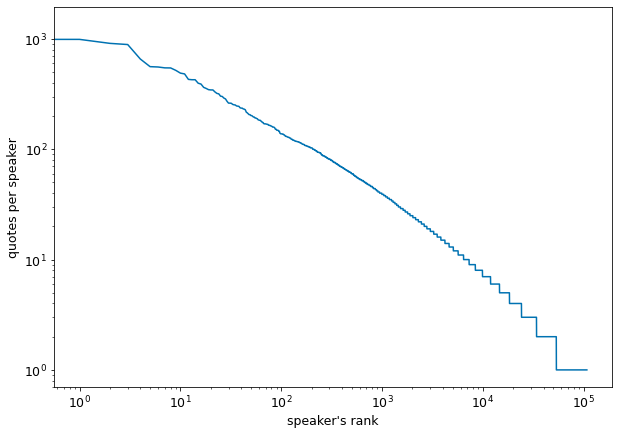

In [15]:
fig,ax = plt.subplots()

ax = df2['quotes_number'].plot(loglog=True, legend=False, ylabel = "quotes per speaker", xlabel="speaker's rank");
ax = plt.plot(x=np.array[0,100000], y=np.array[10000, 0])


To insert in our DataStory maybe it could be coooool.

In [30]:
df['party'][0:11] = [','.join(map(str, l)) for l in df['party'][0:11]]
df[0:11]

C:\Users\alexb\AppData\Local\Temp/ipykernel_19440/2313190176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['party'][0:11] = [','.join(map(str, l)) for l in df['party'][0:11]]


,quoteID,quotation,speaker,qid_unique,date,urls,p1,p2,delta_p,year,...,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,candidacy,type,religion
0,2015-08-19-053089,"It's a rotten process, it's a defiled process,...",Evan Jenne,Q5415439,2015-08-19 22:03:58,[http://www.washingtontimes.com/news/2015/aug/...,0.8643,0.1327,0.7316,2015,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
1,2015-06-19-007527,"By the very definition of the word, this proce...",Evan Jenne,Q5415439,2015-06-19 01:08:41,[http://www.news4jax.com/politics/in-final-hou...,0.8724,0.1276,0.7448,2015,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
2,2015-08-15-072111,Why? If I was allowed to have both hands on th...,Evan Jenne,Q5415439,2015-08-15 16:21:15,[http://web.tampabay.com/news/politics/statero...,0.8298,0.1702,0.6596,2015,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
3,2017-06-24-036281,It's not that hard of a reach to say this law ...,Evan Jenne,Q5415439,2017-06-24 10:30:23,[http://www2.tbo.com/news/florida/on-open-reco...,0.8540,0.1360,0.7180,2017,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
4,2019-04-30-050786,"Is there a moat, a barge system?",Evan Jenne,Q5415439,2019-04-30 00:00:00,[http://floridapolitics.com/archives/295137-ho...,0.7546,0.2036,0.5510,2019,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
5,2019-07-06-009199,He has the ability to go to the far right when...,Evan Jenne,Q5415439,2019-07-06 23:38:07,[https://www.heraldtribune.com/news/20190706/d...,0.8501,0.1258,0.7243,2019,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
6,2020-02-17-038612,It's a hugely important issue and it's one tha...,Evan Jenne,Q5415439,2020-02-17 10:49:44,[https://www.abcactionnews.com/news/local-news...,0.8880,0.1120,0.7760,2020,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
7,2020-02-09-005543,But I'm happy they are finally seeing value in...,Evan Jenne,Q5415439,2020-02-09 05:00:00,[https://www.theledger.com/news/20200208/gop-p...,0.7335,0.2325,0.5010,2020,...,1393420472,None,None,[Q82955],Q29552,None,Q5415439,None,item,None
8,2015-03-10-010014,But the president's not being open and honest ...,Rick Perry,Q215057,2015-03-10 14:01:14,[http://washingtontimes.com/news/2015/mar/10/r...,0.7832,0.1502,0.6330,2015,...,1392328104,None,None,"[Q189290, Q82955, Q131512]","Q29468,Q29552",[Q787674],Q215057,"[Q937607, Q3067807, Q3586278]",item,[Q5043]
9,2015-06-07-031190,"Well, I think it's way outside the norm of rid...",Rick Perry,Q215057,2015-06-07 18:58:13,[http://www.bizpacreview.com/2015/06/07/rick-p...,0.6897,0.2762,0.4135,2015,...,1392328104,None,None,"[Q189290, Q82955, Q131512]","Q29468,Q29552",[Q787674],Q215057,"[Q937607, Q3067807, Q3586278]",item,[Q5043]


In [18]:
df['party'][0:5]

0    Q29552
1    Q29552
2    Q29552
3    Q29552
4    Q29552
Name: party, dtype: object

In [19]:
df['party'][6:8]

6    [Q29552]
7    [Q29552]
Name: party, dtype: object

In [12]:
#One-Hot Encoding to represent categorical variables as binary vectors
onehot = pd.get_dummies(df['party']).add_suffix('_onehot')
df_os=pd.merge(df,
             onehot,
             left_index=True,
             right_index=True)

#check of the operation
df_os.head()

TypeError: unhashable type: 'list'

In [ ]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

In [ ]:
df_nationality = df_plot.groupby('nationality')['nationality'].count() \
            .reset_index(name='count') \
            .sort_values(['count'], ascending=False)
    
df_nationality['nationality'] = df_nationality['nationality'].apply(lambda x: df_lookup.loc[x]['Label'])
ax = sns.barplot(x="nationality", y="count",data=df_nationality[:8])
ax.set(ylabel='Number of quotations')

In [ ]:
#the different columns of the dataframe are converted in numpy arrays:
def numpy_helper(df, cols):
    return df[cols].to_numpy()

In [ ]:
#Test the function numpy_helper:
cols = df.columns
test_helper = numpy_helper(df,cols)
assert('('+str(len(df))+', '+str(len(cols))+')'==str(test_helper.shape))

#Rapid check of the output dimensions:
print('The dataframe of dimension [{},{}] have been converted into a numpy array of dimensions [{}] '.format(len(df),len(cols),test_helper.shape))